In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
from sklearn.metrics import mean_squared_error

In [3]:
data1 = pd.read_csv("C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/data/TagsConseguidos/dataB_con_minutos_totales.csv")
data1.head(10)

,ID del juego,Géneros,Categorías,Fecha de Lanzamiento,Multiplayer,Cantidad de descargas,Precio,In-Purchased,Minutos jugadas,Fecha,Dias_Pasados,Minutos jugadas Totales
0,850170,"Action, Strategy, Free to Play","Single-player, Multi-player, Co-op, Online Co-...","{'date': '15 Aug, 2023'}",1.0,755,0,1,NaN,15/08/2023 00:00,237,942
1,866510,"Adventure, Casual, Indie","Single-player, Multi-player, Steam Achievement...","{'date': '6 Jun, 2018'}",1.0,7,199,1,NaN,06/06/2018 00:00,2133,765
2,820030,"Adventure, Casual, Indie","Single-player, Steam Achievements, Steam Tradi...","{'date': '19 Jun, 2018'}",0.0,7,499,1,NaN,19/06/2018 00:00,2120,769
3,967250,"Action, Adventure, Casual, Indie, RPG, Simulation","Single-player, Steam Achievements, Steam Tradi...","{'date': '5 Nov, 2018'}",0.0,0,99,0,NaN,05/11/2018 00:00,1981,10088
4,703880,"Action, Indie, Strategy","Single-player, Multi-player, PvP, Shared/Split...","{'date': '6 Nov, 2018'}",1.0,0,999,0,NaN,06/11/2018 00:00,1980,1664
5,994910,"Casual, Massively Multiplayer, Simulation, Str...","Multi-player, PvP, Online PvP, Co-op, Online C...","{'date': '23 Sep, 2020'}",1.0,116,0,1,NaN,23/09/2020 00:00,1293,1
6,1013320,"Action, Adventure, Casual, Indie, Massively Mu...","Single-player, Multi-player, MMO, PvP, Online ...","{'date': '26 Sep, 2019'}",1.0,2182,0,1,NaN,26/09/2019 00:00,1656,101992
7,500710,"Action, Adventure, Free to Play, Indie, Massiv...","Multi-player, MMO, Co-op, Cross-Platform Multi...","{'date': '18 Dec, 2017'}",1.0,14,0,1,NaN,18/12/2017 00:00,2303,2370
8,1098340,"Casual, Indie","Single-player, Steam Achievements, Steam Tradi...","{'date': '24 Jun, 2019'}",0.0,2,199,0,NaN,24/06/2019 00:00,1750,3460
9,1015500,"Simulation, Sports","Single-player, Multi-player, Co-op, Shared/Spl...","{'date': '21 Oct, 2019'}",1.0,14,0,0,NaN,21/10/2019 00:00,1631,2887


In [4]:
var_dp = ['In-Purchased', 'Multiplayer', 'Dias_Pasados','Precio']
var_x = data1[var_dp]
var_x

,In-Purchased,Multiplayer,Dias_Pasados,Precio
0,1,1.0,237,0
1,1,1.0,2133,199
2,1,0.0,2120,499
3,0,0.0,1981,99
4,0,1.0,1980,999
...,...,...,...,...
4284,0,0.0,708,599
4285,0,0.0,708,599
4286,0,0.0,708,999
4287,0,1.0,708,499


In [5]:
var_indp = ['Minutos jugadas Totales']
var_y = data1[var_indp]
var_y

,Minutos jugadas Totales
0,942
1,765
2,769
3,10088
4,1664
...,...
4284,4
4285,189
4286,835
4287,529


In [6]:
var_dpindp = ['In-Purchased', 'Multiplayer', 'Dias_Pasados','Precio','Minutos jugadas Totales']
var_z = data1[var_dpindp]
var_z

,In-Purchased,Multiplayer,Dias_Pasados,Precio,Minutos jugadas Totales
0,1,1.0,237,0,942
1,1,1.0,2133,199,765
2,1,0.0,2120,499,769
3,0,0.0,1981,99,10088
4,0,1.0,1980,999,1664
...,...,...,...,...,...
4284,0,0.0,708,599,4
4285,0,0.0,708,599,189
4286,0,0.0,708,999,835
4287,0,1.0,708,499,529


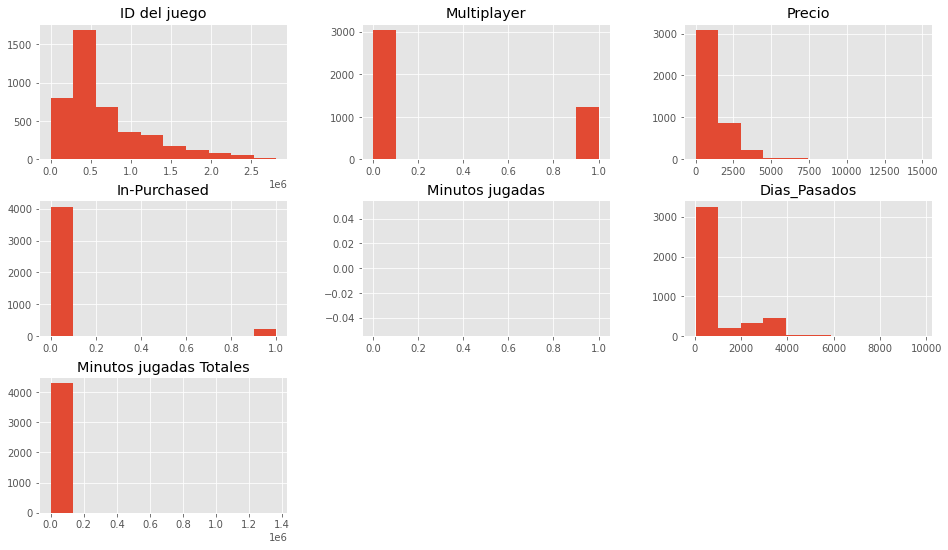

In [7]:
data1.hist()
plt.show()

In [8]:
print(data1.groupby('In-Purchased').size())

In-Purchased
0    4067
1     222
dtype: int64


In [9]:
print(data1.groupby('Minutos jugadas Totales').size())

Minutos jugadas Totales
1          97
2          34
3          32
4          21
5          13
           ..
186355      1
193948      1
216893      1
237354      1
1363641     1
Length: 2107, dtype: int64


c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


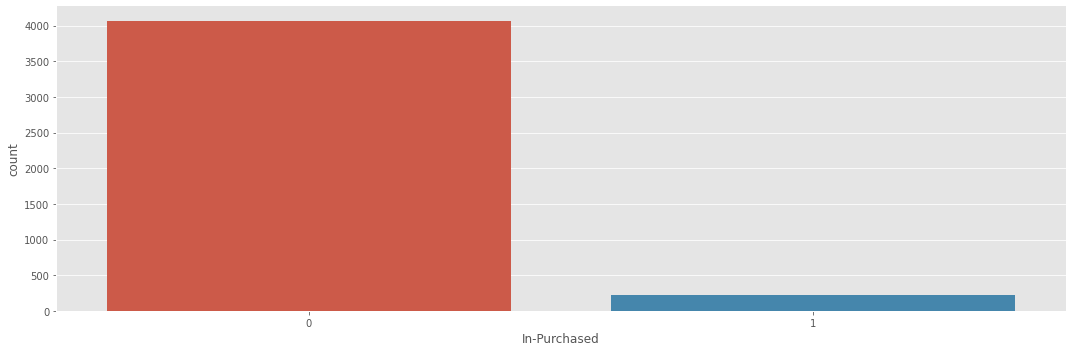

In [10]:
sb.factorplot('In-Purchased',data=data1,kind="count", aspect=3)

c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


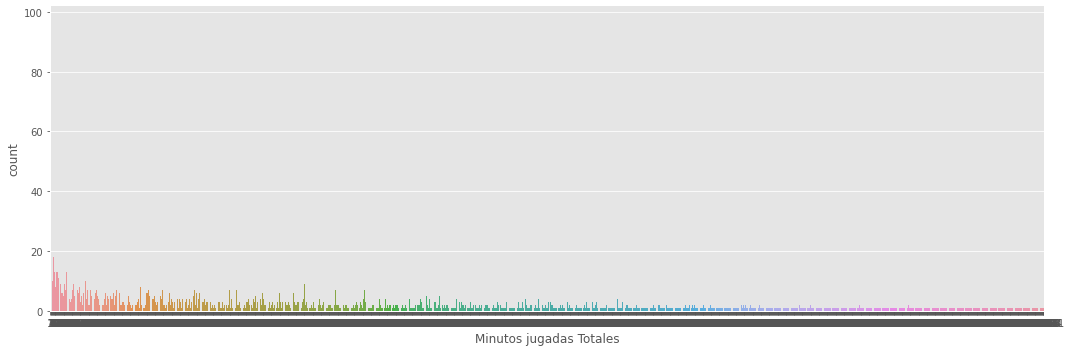

In [11]:
sb.factorplot('Minutos jugadas Totales',data=data1,kind="count", aspect=3)

In [12]:
# Convertir la columna de cadena a tipo entero
data1['Cantidad de descargas'] = pd.to_numeric(data1['Cantidad de descargas'], errors='coerce').astype('Int64')
data1['Cantidad de descargas'] = data1['Cantidad de descargas'].fillna(0)


In [13]:
data1.dtypes

ID del juego                 int64
Géneros                     object
Categorías                  object
Fecha de Lanzamiento        object
Multiplayer                float64
Cantidad de descargas        Int64
Precio                       int64
In-Purchased                 int64
Minutos jugadas            float64
Fecha                       object
Dias_Pasados                 int64
Minutos jugadas Totales      int64
dtype: object

In [14]:
# Reemplazar los NaN con 0 en la columna 'Cantidad de descargas'
data1['In-Purchased'].fillna(0, inplace=True)
data1['Multiplayer'].fillna(0, inplace=True)
data1['Dias_Pasados'].fillna(0, inplace=True)
data1['Precio'].fillna(0, inplace=True)
data1['Minutos jugadas Totales'].fillna(0, inplace=True)
data1['Cantidad de descargas'].fillna(0, inplace=True)

In [15]:
# Seleccionar las columnas de interés
X = data1[['In-Purchased','Multiplayer','Dias_Pasados','Precio']]
y = data1['Minutos jugadas Totales']  # Supongamos que 'Target' es la columna que representa la variable objetivo

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalar las características (opcional pero recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Inicializar los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# 5. Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# 6. Mostrar los resultados
for name, accuracy in results.items():
    print(f'{name}: Accuracy = {accuracy}')
    
from sklearn.metrics import mean_squared_error

# y_true son los valores reales y y_pred son las predicciones del modelo
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)


Logistic Regression: Accuracy = 0.02097902097902098
Decision Tree: Accuracy = 0.01048951048951049
Random Forest: Accuracy = 0.01048951048951049
SVM: Accuracy = 0.019813519813519812
Error cuadrático medio (MSE): 93873925.8018648


In [18]:
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = data1[['In-Purchased','Multiplayer','Dias_Pasados','Precio']]
y = data1['Minutos jugadas Totales'] 

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
mse = mean_squared_error(y_test, y_pred)

# Imprimir los resultados
print("Logistic Regression: Accuracy =", accuracy_log_reg)
print("Decision Tree: Accuracy =", accuracy_decision_tree)
print("Random Forest: Accuracy =", accuracy_random_forest)
print("SVM: Accuracy =", accuracy_svm)
print("Error cuadrático medio (MSE):", mse)

c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.009324009324009324
Decision Tree: Accuracy = 0.01048951048951049
Random Forest: Accuracy = 0.009324009324009324
SVM: Accuracy = 0.022144522144522144
Error cuadrático medio (MSE): 93873925.8018648


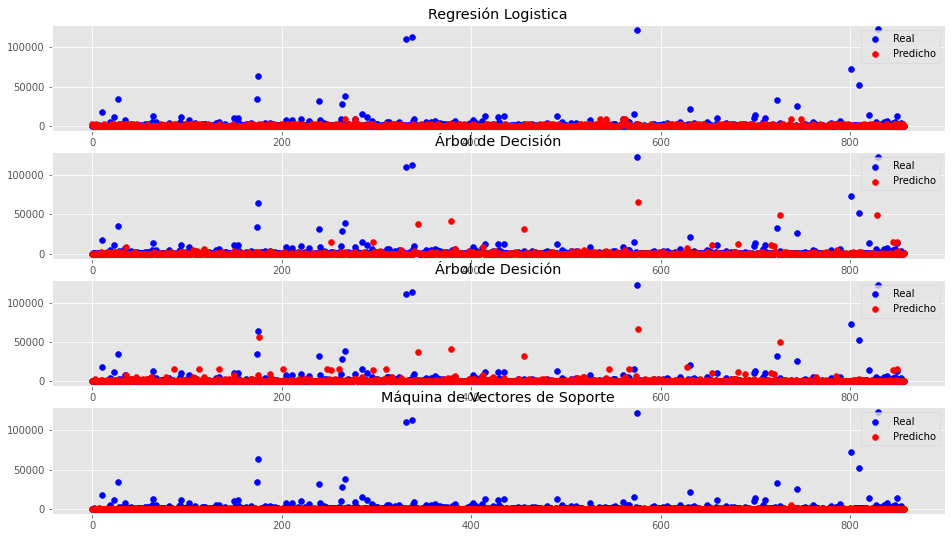

In [19]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(4)

# Crear un rango de valores para el eje x
x_range = range(len(y_test))

# Graficar los resultados reales vs. las predicciones para cada modelo
axs[0].scatter(x_range, y_test, color='blue', label='Real')
axs[0].scatter(x_range, y_pred_log_reg, color='red', label='Predicho')
axs[0].set_title('Regresión Logistica')

axs[1].scatter(x_range, y_test, color='blue', label='Real')
axs[1].scatter(x_range, y_pred_decision_tree, color='red', label='Predicho')
axs[1].set_title('Árbol de Decisión')

axs[2].scatter(x_range, y_test, color='blue', label='Real')
axs[2].scatter(x_range, y_pred_random_forest, color='red', label='Predicho')
axs[2].set_title('Árbol de Desición')

axs[3].scatter(x_range, y_test, color='blue', label='Real')
axs[3].scatter(x_range, y_pred_svm, color='red', label='Predicho')
axs[3].set_title('Máquina de Vectores de Soporte')

# Añadir una leyenda a cada subtrama
for ax in axs:
    ax.legend()

# Mostrar la figura
plt.show()
